In [151]:
import pandas as pd 
import numpy as np 
import datetime
def make_series():
    time_start = datetime.datetime.strptime('20:00:00', '%H:%M:%S')
    time_end = datetime.datetime.strptime('21:00:00', '%H:%M:%S')
    time_list = []
    i = time_start 
    
    while(i<time_end):
        time_list.append(i.time())
        i = i + datetime.timedelta(seconds = 1)
    samples  = pd.Series(np.random.normal(loc=0, scale=1, size=3600))
    time_list = pd.Series(time_list)
    
    columns = ['Time','Value']
    final_df = pd.DataFrame({columns[0]:time_list, columns[1]:samples})
    final_df.set_index(time_list)
    return final_df 
    

In [152]:

X = []
for i in range(50):
    inserter = make_series()
    X.append(inserter)

print((X[0]))


          Time     Value
0     20:00:00  1.042719
1     20:00:01  1.520273
2     20:00:02 -0.926367
3     20:00:03 -0.689720
4     20:00:04 -0.328922
...        ...       ...
3595  20:59:55  0.556572
3596  20:59:56  0.408466
3597  20:59:57  1.238654
3598  20:59:58 -1.129875
3599  20:59:59  0.204169

[3600 rows x 2 columns]


In [153]:
#preprocessing 
from sklearn.preprocessing import MinMaxScaler
def preproscessing(df):
    time_series_data  = df['Value'].values
    time_series_data = time_series_data.reshape(-1,1)
    model = MinMaxScaler()
    scaled_data = model.fit_transform(time_series_data)
    scaled_data = scaled_data.flatten()
    df['Nomalized_values'] = pd.Series(scaled_data)
    df.drop('Value',axis = 1)


In [154]:
for i in X: 
    preproscessing(i)
print(X[1])

          Time     Value  Nomalized_values
0     20:00:00 -0.039851          0.499838
1     20:00:01 -1.071868          0.358512
2     20:00:02  0.098586          0.518796
3     20:00:03  0.014855          0.507329
4     20:00:04  0.227979          0.536515
...        ...       ...               ...
3595  20:59:55 -2.044915          0.225262
3596  20:59:56  0.156631          0.526744
3597  20:59:57 -1.562380          0.291340
3598  20:59:58 -1.736225          0.267534
3599  20:59:59 -0.895137          0.382714

[3600 rows x 3 columns]


In [226]:
#making of quantum machine learning model 
import pennylane as qml
from pennylane.optimize import GradientDescentOptimizer
dev = qml.device('lightning.qubit',wires = 2)
#wires = 2 qubits ciruits 



In [227]:
@qml.qnode(dev)
def my_circuit(params):
    qml.RY(params,wires = 0)
    return qml.expval(qml.PauliZ(0))
    

In [156]:
#angel encoding 
#given classical LSTM work on classical data, we first angle encoode the classical data and then find the expectation values as the input for the network
for dataset in X: 
    dataset['Exp_val'] = dataset['Nomalized_values'].apply(my_circuit)
    dataset.drop('Nomalized_values',axis = 1)
    
 
        


          Time   Exp_val
0     20:00:00  0.806096
1     20:00:01  0.763520
2     20:00:02  0.939481
3     20:00:03  0.927262
4     20:00:04  0.906563
...        ...       ...
3595  20:59:55  0.845521
3596  20:59:56  0.856717
3597  20:59:57  0.789077
3598  20:59:58  0.949118
3599  20:59:59  0.871520

[3600 rows x 2 columns]


In [228]:
def create_sequences(data,seq_length):
    x,y = [], []
    df_as_np = data.to_numpy()
    for i in range(len(data)-seq_length):
        row =  [[a] for a in df_as_np[i:i+seq_length]]
        x.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(x),np.array(y)



(3595, 5, 1)


In [159]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense 



In [243]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 
from sklearn.model_selection import train_test_split

model = Sequential()

model = Sequential()
model.add(LSTM(8,return_sequences=True, input_shape = (5,1)))
model.add(LSTM(8))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse' )

for dataset in X[0:1]: 
    x,y = create_sequences(dataset['Exp_val'],5)
    x_train, x_test_1, y_train, y_test_1 = train_test_split(x,y,test_size = 0.2,random_state = 42)
    model.fit(x,y,epochs = 10,validation_data = (x_test_1,y_test_1),batch_size=32)





Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4750 - val_loss: 0.0049
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0045


In [238]:
#generating output datasets 
time_start = datetime.datetime.strptime('21:00:00', '%H:%M:%S')
time_end = datetime.datetime.strptime('21:03:00', '%H:%M:%S')
time_list = []
i = time_start 
    
while(i<time_end):
    time_list.append(i.time())
    i = i + datetime.timedelta(seconds = 1)
samples  = pd.Series(np.random.normal(loc=0, scale=1, size=180))
time_list = pd.Series(time_list)
    
columns = ['Time','Value']
final_df_a = pd.DataFrame({columns[0]:time_list, columns[1]:samples})
final_df_a.set_index(time_list)
preproscessing(final_df_a)
final_df_a['Exp_val'] = final_df_a['Nomalized_values'].apply(my_circuit)

In [240]:
x_test, y_test = create_sequences(final_df_a['Exp_val'],5)

In [241]:

predictions = model.predict(x_test_1)

predictions = predictions.reshape(719)
time_start = datetime.datetime.strptime('21:00:00', '%H:%M:%S')
time_end = datetime.datetime.strptime('21:03:00', '%H:%M:%S')
time_list_a = []
i = time_start 
    

final_df_a = pd.DataFrame({'Value':y_test_1, 'predictions': predictions})
print(final_df_a.head(10))



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
      Value  predictions
0  0.925492     0.882901
1  0.929842     0.881585
2  0.870871     0.862803
3  0.888258     0.877586
4  0.889837     0.892171
5  0.779904     0.893048
6  0.886770     0.878267
7  0.977109     0.881125
8  0.792095     0.866286
9  0.920129     0.887514


In [250]:
import pickle 
import os 
import numpy as np 
import tensorflow as tf 
from itertools import cycle 
import matplotlib.pyplot as plt 
import pennylane as qml 
from itertools import combinations
from sklearn.metrics import balanced_accuracy_score, f1_score
import random 



In [261]:
def penalty(sigma, contraction_hyperparameter):
    prefac = 1/(np.pi)
    sum_terms = tf.math.atan(2*np.pi*contraction_hyperparameter*tf.abs(sigma))
    mean = np.mean(sum_terms)
    return prefac*mean

In [265]:
model = Sequential()
hyper_parameters = np.array([0.5,0.9,0.2,0.5,0.6])
sigma = np.array([0.9,-0.1,-0.4,0.5,0.25])
model = Sequential()
model.add(LSTM(8,return_sequences=True, input_shape = (5,1)))
model.add(LSTM(8))
model.add(Dense(1))
time_series_loss = 0.0045
model.compile(optimizer = 'adam',loss = 'mse' )
scores = []
print(penalty(sigma,hyper_parameters))
for dataset in X: 
    x,y = create_sequences(dataset['Exp_val'],5)
    x_train, x_test_1, y_train, y_test_1 = train_test_split(x,y,test_size = 0.2,random_state = 42)
    history= model.fit(x,y,epochs = 10,validation_data = (x_test_1,y_test_1),batch_size=32)
    train_loss = np.mean(history.history['loss'])
    
    penalty_1 = penalty(sigma,hyper_parameters)
    anomaly = abs(2*train_loss-2*penalty_1-time_series_loss)
    time_series_loss = train_loss
    scores.append(time_series_loss)

    



0.2527986809360291
Epoch 1/10


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4210 - val_loss: 0.0048
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.00

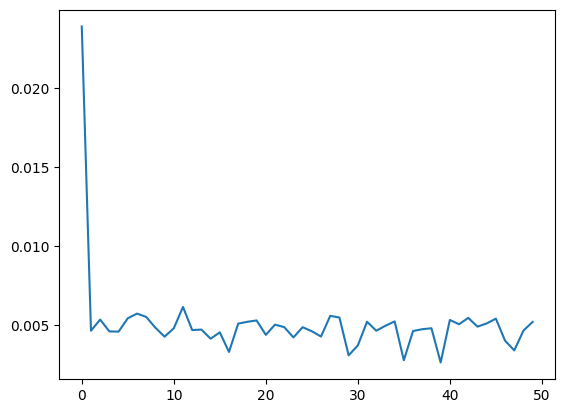

In [273]:
a = np.array([i for i in range(len(scores))])
plt.plot(a,scores)